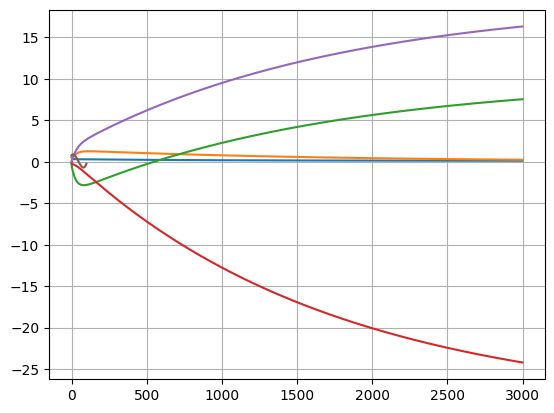

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# MSE
L=100
tk = np.arange(0,1,0.01)
no_of_inputs = 3
W = np.zeros(no_of_inputs+1)
eta = 0.09
iterations = 3000

noise = np.random.normal(0,np.sqrt(0.09),tk.size)
function = np.sin(2*np.pi*tk)+noise

MSE = np.zeros(iterations)
x = np.zeros((L, no_of_inputs+1))
for i in range(L):
    for j in range(no_of_inputs+1):
        x[i,j] = tk[i]**j

W =  np.array([np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1)]).T
for i in range(iterations):
    for j in range(L-1):
        e = (function[j]-W[0].T @ x[j])
        W[0] = W[0] + eta *e*x[j]
        W[i+1] = W[0]
    MSE[i] = np.mean((function-x @ W[0].T)**2)

plt.plot(MSE)
plt.plot(W[1:])
plt.plot(W[1000] @ x.T)
plt.grid()
print()


In [ ]:
#stochastic gradient descent
eta = 0.09
iterations = 1000
W =  np.array([np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1)]).T
for i in range(iterations):
    error = function[j]-W[i].T @ x[j]
    W[i+1] = W[i] - eta*error



error backpropagation
1. Apply an input vector xn to the network and forward propagate through
   the network using (5.48) and (5.49) to find the activations of all the hidden
   and output units.

2. Evaluate the δk for all the output units using (5.54)

3. Backpropagate the δ’s using (5.56) to obtain δj for each hidden unit in the
   network.

4. Use (5.53) to evaluate the required derivatives.


In [209]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
# example 5.3.2
# In the following we sample from Gaussian distribution to generate 3 clusters
L = 10000;

mu_1 = np.array([5, 5]); # mean 
Sigma_1 = np.array([[1, 0.5],[ 0.5, 1]]); # covariance
X_1 = np.random.multivariate_normal(mu_1,Sigma_1,L); # drawing samples from 2D Gaussian ditribution

mu_2 = np.array([-2, -4]);
Sigma_2 = np.array([[3, 0], [0, 1]]);
X_2 = np.random.multivariate_normal(mu_2,Sigma_2,L);

mu_3 = np.array([-6, 3]);
Sigma_3 = np.array([[3, 1], [1, 1]]);
X_3 = np.random.multivariate_normal(mu_3,Sigma_3,L);


# Classification (2 classes)
C_1 = np.matlib.repmat([0,1],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([1,0],L,1); # generate labels for Class 2

C = np.concatenate((C_1,C_2))
X = np.concatenate((X_1,X_2))


# data set containing two classes
data_set = np.concatenate([X,C],1); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 

rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.

# Data_set is a 20000x4 with
# x_1,x_2,c_1,c_2

# My code!
percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

# Least Squares method
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T
t = np.array([train_dataset[:,2],train_dataset[:,3]]).T
w1 = 2 * np.random.random((16000, 3)) - 1
w2 = 2 * np.random.random((16000, 1)) - 1

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

t_test =test_dataset[:,3]
for i in range(len(t_test)):
    if t_test[i] == 0:
        t_test[i] = -1

w1 = 2 * np.random.random((16000, 3)) - 1
w2 = 2 * np.random.random((16000, 2)) - 1

# Train the neural network
for i in range(10000):
    
    # Forward propagation
    layer1 = sigmoid(x@w1)
    layer2 = sigmoid(layer1@ w2)
    
    # Calculate the error
    error = t - layer2
    
    # Backpropagation
    layer2_delta = error * sigmoid_derivative(layer2)
    layer1_delta = layer2_delta.dot(w2.T) * sigmoid_derivative(layer1)
    
    # Update the weights
    w2 += eta * layer1.T.dot(layer2_delta)
    w1 += eta * x.dot(layer1_delta)



# layer1 = np.zeros(len(train_dataset))
# layer2 = np.zeros(len(train_dataset))
# # Computing y
# for i in range(len(train_dataset)):
#     layer1[i] = 1/(1+np.exp(x[i]@w1[i]))
#     layer2[i] = 1/(1+np.exp(layer1[i]*w2[i]))

#     error = t[i] - layer2[i]

#     layer2_delta = error * 1/(1+np.exp(layer2[i])) * (1-1/(1+np.exp(layer2[i])))
#     layer1_delta = layer2_delta*w2[i].T * 1/(1+np.exp(layer1[i])) * (1-1/(1+np.exp(layer1[i])))

#     w2[i+1] = eta * layer1[i]@layer2_delta.T
#     w1[i+1] = eta * X.T@layer1_delta



ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 16000 is different from 3)

In [ ]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

# In the following we sample from Gaussian distribution to generate 3 clusters
L = 10000;

mu_1 = np.array([5, 5]); # mean 
Sigma_1 = np.array([[1, 0.5],[ 0.5, 1]]); # covariance
X_1 = np.random.multivariate_normal(mu_1,Sigma_1,L); # drawing samples from 2D Gaussian ditribution

mu_2 = np.array([-2, -4]);
Sigma_2 = np.array([[3, 0], [0, 1]]);
X_2 = np.random.multivariate_normal(mu_2,Sigma_2,L);

mu_3 = np.array([-6, 3]);
Sigma_3 = np.array([[3, 1], [1, 1]]);
X_3 = np.random.multivariate_normal(mu_3,Sigma_3,L);


#figure
plt.plot(X_1[:,0],X_1[:,1],'bs','MarkerSize',10)
plt.plot(X_3[:,0],X_3[:,1],'gs','MarkerSize',10)
#plt.plot(X_2[:,0],X_2[:,1],'rs','MarkerSize',10) 

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.show

# Classification (2 classes)
C_1 = np.matlib.repmat([0,1],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([1,0],L,1); # generate labels for Class 2

C = np.concatenate((C_1,C_2))
X = np.concatenate((X_1,X_2))

# data set containing two classes
data_set = np.concatenate([X,C],1); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 

rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.
t = train_dataset[:,3]
for i in range(len(t)):
    if t[i] == 0:
        t[i] = -1
# Data_set is a 20000x4 with
# x_1,x_2,c_1,c_2

In [ ]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

L_iter = 10000
eta = 0.09
#print(data_set[0:10,3])
# Perceptron
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T
W =  np.array([np.zeros(len(train_dataset)),np.zeros(len(train_dataset)),np.zeros(len(train_dataset))]).T


# Train the neural network
for i in range(10000):
    
    # Forward propagation
    layer1 = sigmoid(x@w1)
    layer2 = sigmoid(layer1@ w2)
    
    # Calculate the error
    error = t - layer2
    
    # Backpropagation
    layer2_delta = error * sigmoid_derivative(layer2)
    layer1_delta = layer2_delta.dot(w2.T) * sigmoid_derivative(layer1)
    
    # Update the weights
    w2 += eta * layer1.T.dot(layer2_delta)
    w1 += eta * x.dot(layer1_delta)




In [1]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

import numpy as np
import matplotlib.pyplot as plt

I = np.identity(3)



In [2]:
N = 50
eta = 0.09

x = np.column_stack([np.ones(50),np.linspace(-1,1,N)])

y1 = x[:,1]**2
y2 = np.sin(x[:,1])
y3 = np.abs(x[:,1])
y4 = np.heaviside(x[:,1],0)
def tanh(x):
    return np.tanh(x)

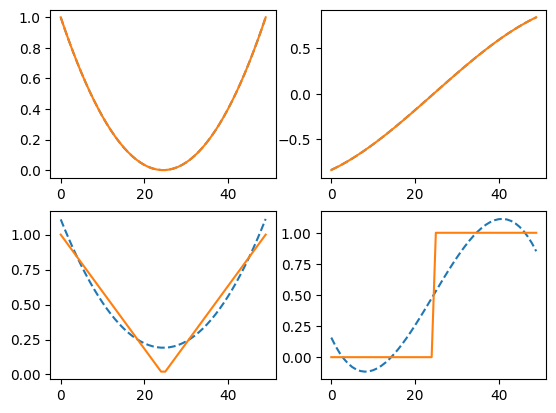

In [4]:
sigma=0.1
V = np.random.normal(0,sigma,(3,2))


phi = np.tanh(x@V.T)
phi = np.array([np.ones(50),phi[:,0],phi[:,1],phi[:,2]]).T
W1 = np.linalg.pinv(phi)@y1
W2 = np.linalg.pinv(phi)@y2
W3 = np.linalg.pinv(phi)@y3
W4 = np.linalg.pinv(phi)@y4

ytk_1= W1@phi.T
ytk_2= W2@phi.T
ytk_3= W3@phi.T
ytk_4= W4@phi.T


#plot 1:
plt.subplot(2, 2, 1)
plt.plot(ytk_1,linestyle="dashed")
plt.plot(y1)

#plot 2:
plt.subplot(2, 2, 2)
plt.plot(ytk_2,linestyle="dashed")
plt.plot(y2)

#plot 3:
plt.subplot(2, 2, 3)
plt.plot(ytk_3,linestyle="dashed")
plt.plot(y3)

#plot 4:
plt.subplot(2, 2, 4)
plt.plot(ytk_4,linestyle="dashed")
plt.plot(y4)

plt.show()

In [ ]:
(1-np.tanh(a))**2

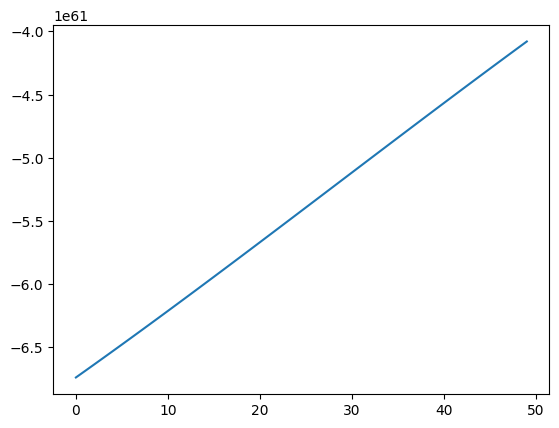

In [89]:
W = np.random.normal(0,sigma,(3,2))
V = np.random.normal(0,sigma,(1,4))


def NN(x,y,eta,V,W):
    for i in range(len(x)):
        aj = x@W.T

        zj = np.tanh(aj)
        zj = np.array([np.ones(50),zj[:,0],zj[:,1],zj[:,2]]).T 
        yk = V@zj.T
        dk = yk - y
        dj = (1-zj**2)*dk.T*V
        delta_k_weight = dk@ zj
        delta_j_weight = x.T@dj

        V = V + eta*delta_k_weight
        W = W + eta*delta_j_weight[:,1:].T
    return V,W

V,W = NN(x,y1,0.09,V,W)
zj = np.tanh(aj)
zj = np.array([np.ones(50),zj[:,0],zj[:,1],zj[:,2]]).T 
yk = V@zj.T
yk = yk[0]
plt.plot(yk)
print()

In [218]:
def NN(x,y,eta,V,W):
    for i in range(len(x)):
        pattern = x[i].reshape((1,2))

        aj = (V @ pattern[0])
        zj = np.hstack((1,np.tanh(aj)))

        yk = W@zj
        dk = yk - y[i]
        dj = ((1-zj**2)*W*dk.T)[:,1:]   


        V = V + eta*dj.T@pattern
        W = W + eta*dk

    return V,W


V= np.random.normal(0,sigma,(3,2))
W = np.random.normal(0,sigma,(1,4))
x = np.column_stack([np.ones(50),np.linspace(-1,1,N)])

y1 = x[:,1]**2

V,W = NN(x,y1,0.09,V,W)